Prep and organize the data from the original list of combined initials and final samples into folders, one for each initial and final. 

First create the folders, second move the existing samples into those folders. 

In [41]:
import os
from shutil import copyfile
initials = "b p m f d t n l g k h j q x zh ch sh r z c s".split()
finals = "a o e ai ei ao ou an en ang eng ong u ua uo uai ui uan uang un ueng i ia ie iao iu ian iang in ing iong ü üe üan ün".split()
print(len(initials))
print(len(finals))
# create folders for each of the initials and finals if they do not exist
for f in initials+finals:
    if (os.path.isdir('./pinyin/{0}'.format(f)) is False):
        print('./pinyin/{0}'.format(f))
        os.mkdir('./pinyin/{0}'.format(f))
        
#move each file into the appropriate directory for the file
for f in os.listdir('./samples'):
    shutil(f, "./pinyin/{0}".format(f[0]))




21
35
./pinyin/b
./pinyin/p
./pinyin/m
./pinyin/f
./pinyin/d
./pinyin/t
./pinyin/n
./pinyin/l
./pinyin/g
./pinyin/k
./pinyin/h
./pinyin/j
./pinyin/q
./pinyin/x
./pinyin/zh
./pinyin/ch
./pinyin/sh
./pinyin/r
./pinyin/z
./pinyin/c
./pinyin/s
./pinyin/a
./pinyin/o
./pinyin/e
./pinyin/ai
./pinyin/ei
./pinyin/ao
./pinyin/ou
./pinyin/an
./pinyin/en
./pinyin/ang
./pinyin/eng
./pinyin/ong
./pinyin/u
./pinyin/ua
./pinyin/uo
./pinyin/uai
./pinyin/ui
./pinyin/uan
./pinyin/uang
./pinyin/un
./pinyin/ueng
./pinyin/i
./pinyin/ia
./pinyin/ie
./pinyin/iao
./pinyin/iu
./pinyin/ian
./pinyin/iang
./pinyin/in
./pinyin/ing
./pinyin/iong
./pinyin/ü
./pinyin/üe
./pinyin/üan
./pinyin/ün
c
n
y
m
n
j
a
r
f
s
z
b
d
w
c
k
g
j
b
l
l
w
r
l
b
c
n
h
x
z
m
p
n
n
s
q
w
c
n
l
y
b
y
m
n
c
n
k
y
x
y
j
j
f
c
s
z
g
s
q
l
r
l
g
b
f
z
d
h
l
g
s
j
n
z
b
q
s
k
q
p
j
b
z
z
d
b
l
t
g
w
j
a
g
d
t
t
n
c
q
s
c
q
t
h
g
h
h
t
s
x
t
r
m
s
d
h
s
b
j
c
s
h
s
z
q
m
x
e
g
s
g
c
t
x
l
n
r
h
t
f
c
b
s
c
b
f
t
t
k
y
h
z
s
f
j
l
z
g
q
n
c
s
m
z

<class 'numpy.ndarray'> <class 'int'>
(19558,) 22050
(20, 39)
<class 'numpy.ndarray'> <class 'int'>
(20066,) 22050
(20, 40)
<class 'numpy.ndarray'> <class 'int'>
(20320,) 22050
(20, 40)
<class 'numpy.ndarray'> <class 'int'>
(27686,) 22050
(20, 55)


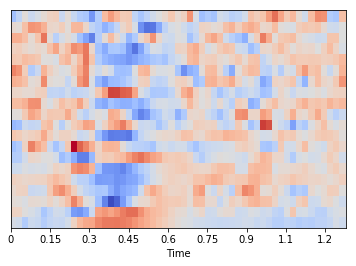

In [30]:
import librosa                                                                                                                                                           
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import sklearn

#TODO convert this to class methods on an AudioSample class
def load_audio(path):
    x, sr = librosa.load(path)
    print(type(x), type(sr))
    print(x.shape, sr)
    return x, sr
 
def show_player(path):
    ipd.Audio(audio_path)

def show_plot(x, sr):
    plt.figure(figsize=(14,5))
    librosa.display.waveplot(x, sr=sr)

def show_spectragram(x, sr):
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    #log is probably more useful
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def show_waveplot(x):
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)
    #this is a zoom
    n0 = 9000
    n1 = 9100
    plt.figure(figsize=(14, 5))
    plt.plot(x[n0:n1])
    plt.grid()
    

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

    
def zero_crossings(x):
    zero_crossings = librosa.zero_crossings(x, pad=False)
    print(sum(zero_crossings))
    return zero_crossings

def spectral_centroid(x, sr):
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    # Computing the time variable for visualization
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)

    #Plotting the Spectral Centroid along the waveform
    librosa.display.waveplot(x, sr=sr, alpha=0.4)
    plt.figure(figsize=(14, 5))
    normalized_spectral_centroids = normalize(spectral_centroids)
    plt.plot(t,  normalized_spectral_centroids, color='r')
    return normalized_spectral_centroids

def spectral_rolloff(x, sr):
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    spectral_rolloff = normalize(librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0])
    librosa.display.waveplot(x, sr=sr, alpha=0.4)
    plt.figure(figsize=(14, 5))
    plt.plot(t, spectral_rolloff, color='r')
    return spectral_rolloff

def mel_frequency_cepstral_coefficients(x, sr):
    mfccs = librosa.feature.mfcc(x, sr=sr)
    print(mfccs.shape)
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    #Displaying  the MFCCs:  
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    return mfccs

def getpinyin():
    
#TODO separate out into a file class
def build_file_header(): 
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    
def write_file():
    file = open('data.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    pinyin = getpinyin()
    'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    for p in pinyin:
        for filename in os.listdir(f'./samples/{g}'):
            songname = f'./samples/{g}/{filename}'
            y, sr = librosa.load(songname, mono=True, duration=30)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {g}'
            file = open('data.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
  

audio_paths = ["samples/ceng1.wav", "samples/ceng2.wav", "samples/ceng3.wav", "samples/ceng4.wav"]
for path in audio_paths:    
    x, sr = load_audio(path)
    show_player(path)
    #show_plot(x, sr)
    #show_spectragram(x, sr)
    #zero_crossings(x)

    #spectral_centroid(x, sr)
    #spectral_rolloff(x, sr)
    mel_frequency_cepstral_coefficients(x,sr)


    
